**Import Libraries**

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
%matplotlib inline

**Load Data**

In [16]:

# Self-contained K-Means Clustering Lab (no external files needed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) Generate a synthetic "customer-like" dataset (3 clusters)
X_raw, y_true = make_blobs(n_samples=600, centers=3, n_features=4, cluster_std=[1.0, 1.5, 0.8], random_state=42)
cust_df = pd.DataFrame(X_raw, columns=["AnnualIncome", "SpendingScore", "AgeIndex", "TenureIndex"])
cust_df["Segment_true"] = y_true

# 2) Standardize features
features = ["AnnualIncome", "SpendingScore", "AgeIndex", "TenureIndex"]
X = StandardScaler().fit_transform(cust_df[features].values)

# 3) Elbow method (WCSS / inertia)
inertias = []
K_range = range(2, 20)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method (WCSS vs k)")
plt.xlabel("k (number of clusters)")
plt.ylabel("WCSS / Inertia")
plt.grid(True)
plt.show()

# 4) Silhouette coefficients
silhouette_coefficients = []
for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_coefficients.append(score)

plt.figure(figsize=(6, 4))
plt.plot(list(K_range), silhouette_coefficients, marker="o")
plt.title("Silhouette Coefficient vs k")
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Coefficient")
plt.grid(True)
plt.show()

# 5) Choose k by maximum silhouette (simple heuristic)
best_k = int(K_range[np.argmax(silhouette_coefficients)])
print(f"Chosen k (by max silhouette): {best_k}")

# 6) Fit final model and visualize 2D projection (PCA for plotting)
from sklearn.decomposition import PCA
km_final = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_final = km_final.fit_predict(X)

pca = PCA(n_components=2, random_state=42)
XY = pca.fit_transform(X)
plot_df = pd.DataFrame({"x": XY[:,0], "y": XY[:,1], "cluster": labels_final})

plt.figure(figsize=(6, 5))
sns.scatterplot(data=plot_df, x="x", y="y", hue="cluster", style="cluster")
plt.title(f"K-Means clustering (k={best_k}) on PCA projection")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Drop the unrequired column**

In [19]:
df = cust_df.drop('Address', axis=1)
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


**nan_to_num and Standard Scalar Data**

nan_to_num:
Replace nan with zero and inf with finite numbers. Returns an array or scalar replacing Not a Number (NaN) with zero, (positive) infinity with a very large number and negative infinity with a very small (or negative) number.
(dftaFrf)**

In [23]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet.shape

(850, 8)

In [25]:
Clus_dataSet
print(X)

[[41.     2.     6.    ...  1.073  0.     6.3  ]
 [47.     1.    26.    ...  8.218  0.    12.8  ]
 [33.     2.    10.    ...  5.802  1.    20.9  ]
 ...
 [25.     4.     0.    ...  3.21   1.    33.4  ]
 [32.     1.    12.    ...  0.696  0.     2.9  ]
 [52.     1.    16.    ...  3.638  0.     8.6  ]]


**Setting up K-Means Clustering**



The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

Fit the KMeans model with the feature matrix 

Grab the labels for each point in the model using k_means.labels_  attribute 

In [28]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 2 1 0 1 1 1 1 1 1 2 0 1 1 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 2
 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 0 1 2 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 0 1 

In [34]:
# Get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as k_means_cluster_centers .
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[4.13333333e+01, 1.95628415e+00, 1.52568306e+01, 8.39289617e+01,
        3.10363934e+00, 5.76527869e+00, 1.36612022e-01, 1.07245902e+01],
       [3.29645609e+01, 1.61479199e+00, 6.37442219e+00, 3.11648690e+01,
        1.03254083e+00, 2.10413251e+00, 2.37288136e-01, 1.00947612e+01],
       [4.53888889e+01, 2.66666667e+00, 1.95555556e+01, 2.27166667e+02,
        5.67844444e+00, 1.09071667e+01, 2.22222222e-01, 7.32222222e+00]])

In [36]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [38]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590
1,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
2,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222


In [40]:
print(X[:,0:6])

[[ 41.      2.      6.     19.      0.124   1.073]
 [ 47.      1.     26.    100.      4.582   8.218]
 [ 33.      2.     10.     57.      6.111   5.802]
 ...
 [ 25.      4.      0.     18.      2.802   3.21 ]
 [ 32.      1.     12.     28.      0.116   0.696]
 [ 52.      1.     16.     64.      1.866   3.638]]


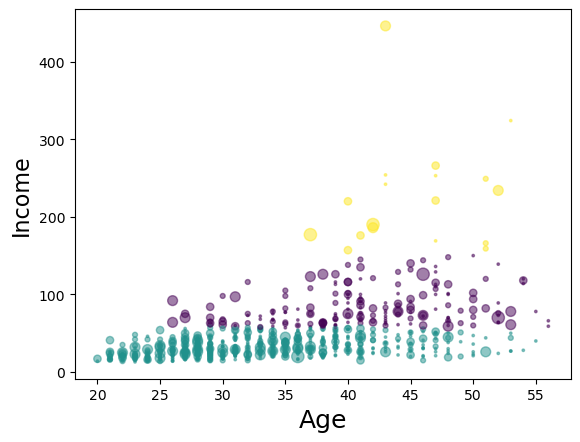

In [66]:
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 0], X[:,3], s=area, c=labels.astype(float), alpha=0.5) 
# Use built-in 'float', alpha alpha value sets the face transparency for objects in the current axes that support transparency.
#Specify value as 'clear' or 'opaque' , or as a number in the range [0, 1]. 
#A value of 0 makes the objects transparent, and value of 1 makes the objects fully opaque.
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Run Cluster Analysis and Plot Elbow Curve**

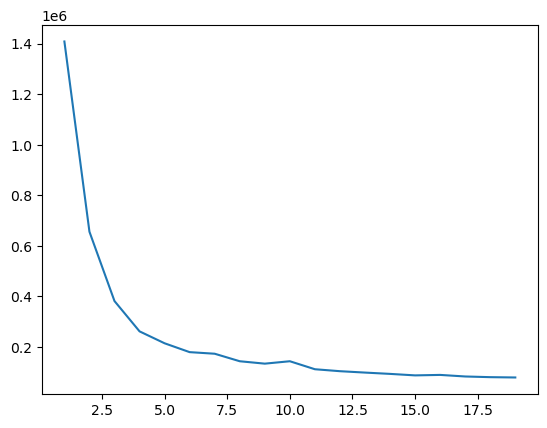

In [70]:
from sklearn.cluster import KMeans
K=range(1,20)
WCSS=[]
for i in K:
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)
  WCSS
  
plt.plot(K,WCSS)

**Store the number of cluster and WSS Score in dataframe**

In [76]:
mycenters=pd.DataFrame({'Cluster':K,"WCSS":WCSS})
mycenters

,Cluster,WCSS
0,1,1.408001e+06
1,2,6.559937e+05
2,3,3.818507e+05
3,4,2.620704e+05
4,5,2.149420e+05
5,6,1.799374e+05
6,7,1.736426e+05
7,8,1.439315e+05
8,9,1.344283e+05
9,10,1.439541e+05


<Axes: xlabel='Cluster', ylabel='WCSS'>

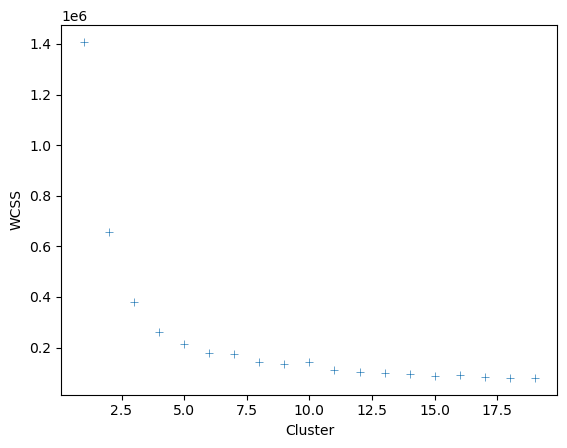

In [80]:
sns.scatterplot(x="Cluster",y="WCSS",data=mycenters, marker='+')

We get 5 cluster i.e.K=5

**Silhouette method to identifyf clusters**

Cluster 2 Score 0.6857530340991117
Cluster 3 Score 0.565899144232353
Cluster 4 Score 0.5202999123367267
Cluster 5 Score 0.3504201739953672
Cluster 6 Score 0.2678470487741821
Cluster 7 Score 0.2733965104892317
Cluster 8 Score 0.2590191908240066
Cluster 9 Score 0.26680009531130333
Cluster 10 Score 0.25888065841568475
Cluster 11 Score 0.2459184700917345
Cluster 12 Score 0.25422863046051214
Cluster 13 Score 0.234595018480288
Cluster 14 Score 0.24989613191821364
Cluster 15 Score 0.2351808670897485
Cluster 16 Score 0.23976779336070334
Cluster 17 Score 0.2159716970486498
Cluster 18 Score 0.21643120792178439
Cluster 19 Score 0.20270415228168354


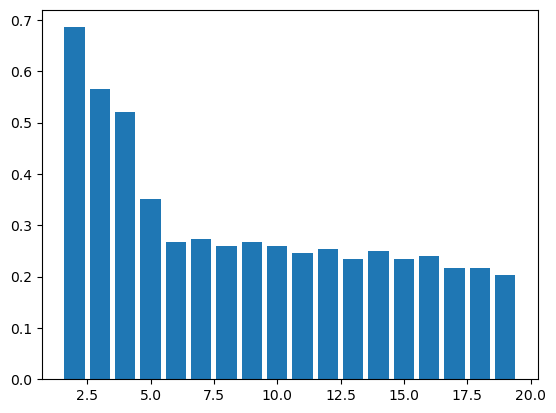

In [105]:

import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silh=[]

for i in range(2,20):
    kmeans = KMeans(n_clusters=i)
    #labels=kmeans.fit_predict(X)
    silhouette_avg=silhouette_score(X, kmeans.fit_predict(X))
    silh.append(silhouette_avg)
    print('Cluster',i,'Score',silhouette_avg)

plt.bar(range(2,20),silh)
plt.show()

Elbow curve and Silhouette plots both are very useful techniques for finding the optimal K for k-means clustering. In real-world data sets, you will find quite a lot of cases where the elbow curve is not sufficient to find the right ‘K’. In such cases, you should use the silhouette plot to figure out the optimal number of clusters for your dataset. I would recommend using both the techniques together to figure out the optimal K for k-means clustering.    

      

In [96]:
from sklearn.metrics import silhouette_score
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
    }


# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(X)
     score = silhouette_score(X, kmeans.labels_)
     silhouette_coefficients.append(score)
     print("k:",k,  "silhouette_coefficients:",silhouette_coefficients)

k: 2 silhouette_coefficients: [0.6857530340991117]
k: 3 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684]
k: 4 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194]
k: 5 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194, 0.3504201739953672]
k: 6 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194, 0.3504201739953672, 0.26834271172311325]
k: 7 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194, 0.3504201739953672, 0.26834271172311325, 0.2732160332762459]
k: 8 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194, 0.3504201739953672, 0.26834271172311325, 0.2732160332762459, 0.2627229721882661]
k: 9 silhouette_coefficients: [0.6857530340991117, 0.5616660500867684, 0.4720634111054194, 0.3504201739953672, 0.26834271172311325, 0.2732160332762459, 0.2627229721882661, 0.24854700779794764]
k: 10 silhouette_coefficien

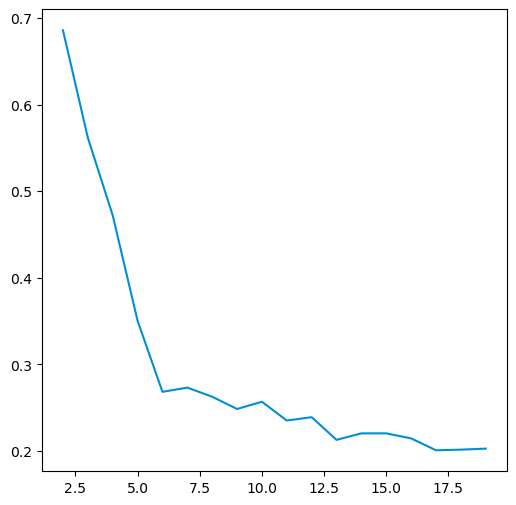

In [99]:

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(range(2, 20), silhouette_coefficients, c="#008fd5", label="Silhouette Coefficient" )

<Axes: >

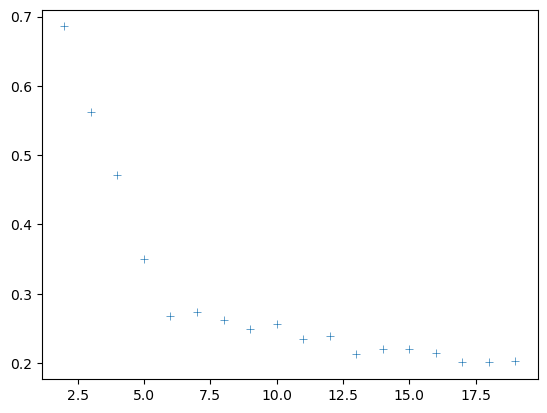

In [101]:
sns.scatterplot(x=range(2,20), y=silhouette_coefficients , marker='+')
plt.title('Silhouette coefficients (scatter)')
plt.show()

In [ ]:

# Additional scatter view for the elbow curve
sns.scatterplot(x=list(range(2,20)), y=inertias, marker="o")
plt.title("Elbow WCSS (scatter)")
plt.xlabel("k")
plt.ylabel("WCSS / Inertia")
plt.grid(True)
plt.show()
